In [6]:
import pandas
dataset = pandas.read_csv('/Users/chenzy/Documents/spring quarter/tim245/hw3/survey_dataset.csv', sep=',')
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)

music = dataset.iloc[:, 0:19]
movies = dataset.iloc[:, 19:31]
hobbies = dataset.iloc[:, 31:63]
phobias = dataset.iloc[:, 63:73]
health = dataset.iloc[:, 73:76]
personality = dataset.iloc[:, 76:133]
spending = dataset.iloc[:, 133:140]
demographics = dataset.iloc[:, 140:150]

selected_category = phobias

dataset = pandas.concat([selected_category, demographics], axis=1)
dataset = pandas.get_dummies(dataset)
dataset.head(10)

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,...,Education_doctorate degree,Education_masters degree,Education_primary school,Education_secondary school,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow
0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,...,0,0,0,0,1,0,0,1,1,0
1,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,...,0,0,0,0,1,0,1,0,1,0
2,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,...,0,0,0,1,1,0,1,0,1,0
3,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0,...,0,0,0,1,1,0,0,1,0,1
4,3.0,2.0,2.0,2.0,1.0,2,2.0,1.0,1.0,3.0,...,0,0,0,1,1,0,1,0,1,0
5,1.0,3.0,2.0,1.0,1.0,5,1.0,4.0,1.0,1.0,...,0,0,0,1,1,0,0,1,0,1
6,3.0,2.0,4.0,3.0,1.0,5,3.0,1.0,2.0,4.0,...,0,0,0,0,1,0,1,0,0,1
7,4.0,5.0,4.0,5.0,3.0,4,4.0,3.0,5.0,3.0,...,0,0,0,1,1,0,1,0,1,0
8,1.0,1.0,2.0,2.0,2.0,1,1.0,1.0,4.0,2.0,...,0,0,0,1,1,0,1,0,1,0
9,4.0,1.0,1.0,3.0,5.0,5,5.0,5.0,5.0,5.0,...,0,0,1,0,1,0,1,0,1,0


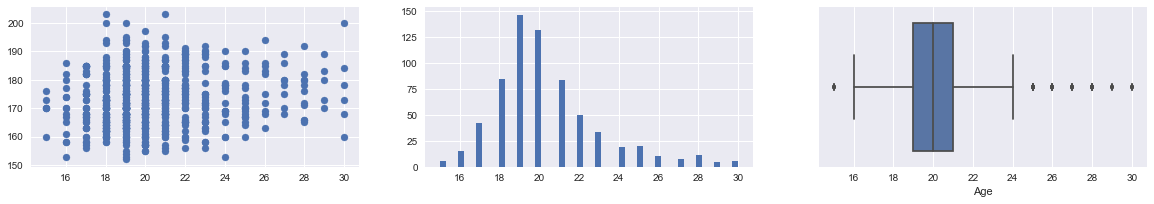

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#descriptive statistics
dataset.describe()

plt.figure(figsize=(20, 10))
#subplot syntax is rows, total number of plots, current plot index
plt.subplot(3,3,1)
plt.scatter(dataset['Age'], dataset['Height'])
plt.subplot(3,3,2)
plt.hist(dataset['Age'],bins=50)
plt.subplot(3,3,3)
sns.boxplot(dataset['Age'])
plt.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 674 / 674
[t-SNE] Mean sigma: 4.005482
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.653706
[t-SNE] Error after 175 iterations: 0.653706


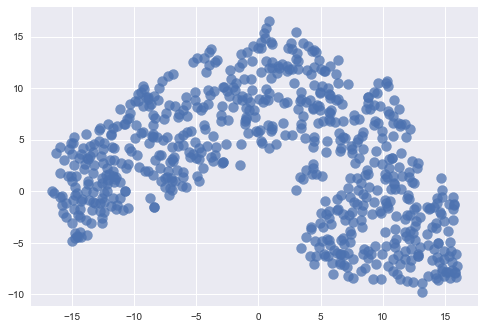

In [8]:
from sklearn.manifold import TSNE

#create the TSNE representation
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
dataset_tsne = tsne.fit_transform(dataset)

#get the values for the two dimensional representation (x,y) for each instance in the dataset
tsne_x =  dataset_tsne [:,0]
tsne_y = dataset_tsne [:,1]

#plot the data
scatter = plt.scatter(tsne_x, tsne_y, alpha = .75,s = 100)
plt.show()

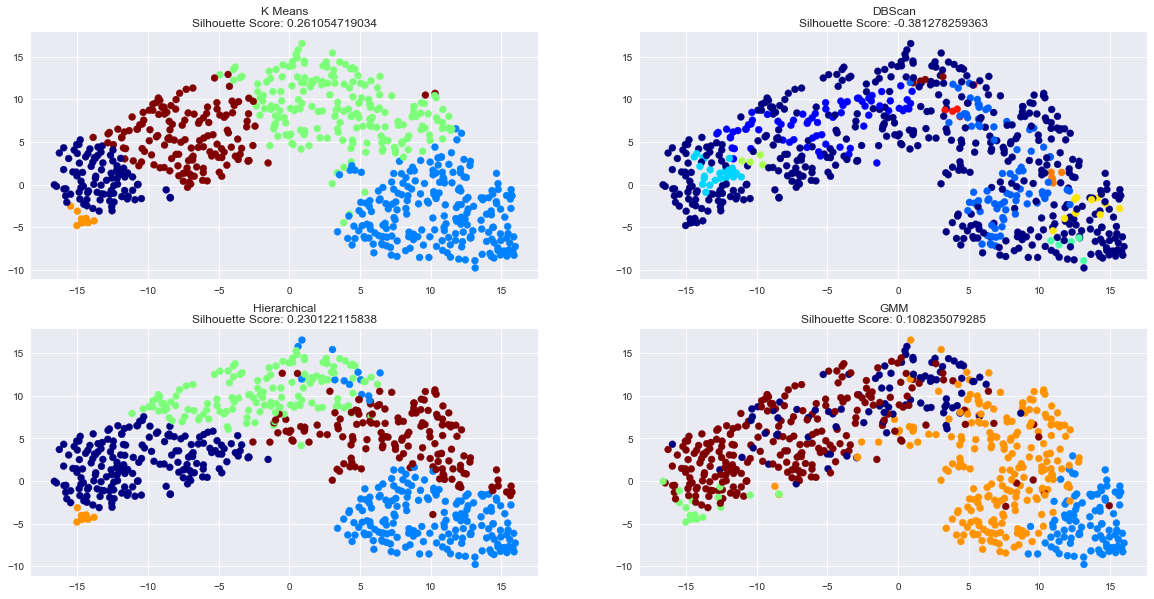

In [23]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
plt.rcParams['image.cmap'] = 'jet'

#k is the number of clusters and epsilon is radius in db-scan
k = 5
epsilon = 5
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=k)
dbscan = cluster.DBSCAN(eps= epsilon)
hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
gaussian_mm = mixture.GaussianMixture(n_components=k)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)

#compute the silhouette score for each clustering
kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)

#must have more than 1 cluster to compute the silhouette_score for dbscan
noise_index = np.argwhere(dbscan_labels==-1)
if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
    dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
else:
    dbscan_silhouette_score = None
    
hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)


#plot the results using the T-SNE representation
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.scatter(tsne_x, tsne_y, c= kmeans_labels)
plt.title('K Means'  + "\n" + 'Silhouette Score: ' + str(kmeans_silhouette_score))
plt.subplot(2,2,2)
plt.scatter(tsne_x, tsne_y, c= dbscan_labels)
plt.title('DBScan'  + "\n" + 'Silhouette Score: ' + str(dbscan_silhouette_score))
plt.subplot(2,2,3)
plt.scatter(tsne_x, tsne_y, c= hierarchical_labels)
plt.title('Hierarchical'  + "\n" + 'Silhouette Score: ' + str(hierarchical_silhouette_score))
plt.subplot(2,2,4)
plt.scatter(tsne_x, tsne_y, c= gaussian_mm_labels)
plt.title('GMM'  + "\n" + 'Silhouette Score: ' + str(gaussian_mm_silhouette_score))
plt.show()

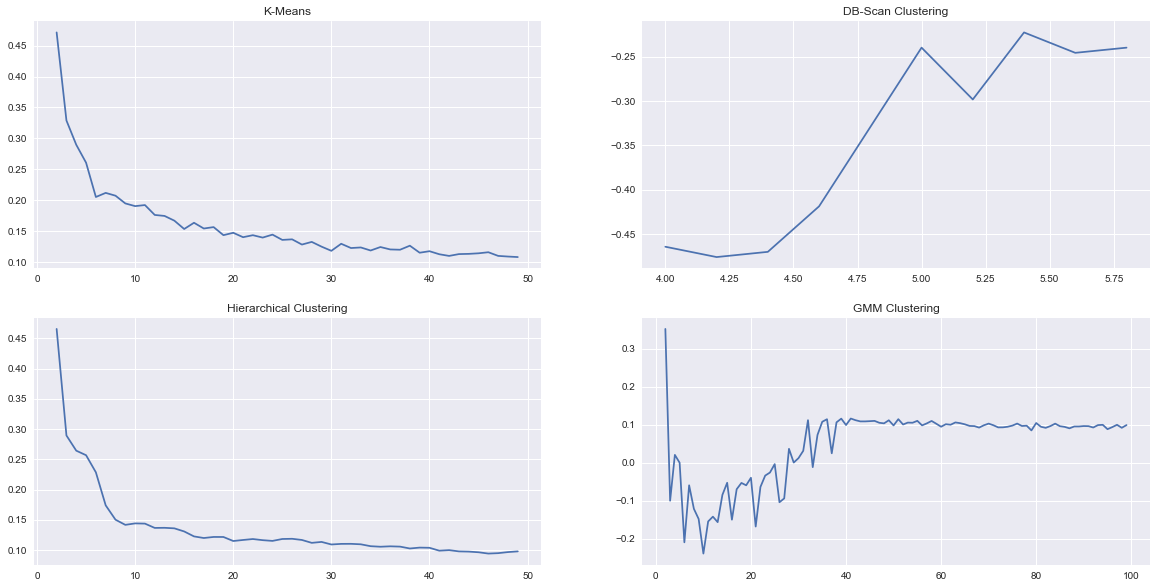

In [14]:
#scores for the parameters
kmeans_silhouette_scores = []
dbscan_silhouette_scores = []
hierarchical_silhouette_scores = []
gaussian_mm_silhouette_scores = []

distance_metric = 'euclidean'

#loop through different values for k and compute the silhouette score
for k in range(2,50,1):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(dataset)
    kmeans_labels = kmeans.labels_
    kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)
    kmeans_silhouette_scores.append(kmeans_silhouette_score)

#loop through different values for epsilon and compute the silhouette score
for epsilon in range(2,50,1):
    dbscan = cluster.DBSCAN(eps=epsilon*1.0/5)
    dbscan.fit(dataset)
    dbscan_labels = dbscan.labels_
    #must have more than 1 cluster to compute the silhouette_score
    noise_index = np.argwhere(dbscan_labels==-1)
    if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
        dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
        #dbscan_silhouette_scores.append(dbscan_silhouette_score)
    else:
        dbscan_silhouette_score = None
        #dbscan_silhouette_scores.append(0)
    dbscan_silhouette_scores.append(dbscan_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,50,1):
    hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
    hierarchical.fit(dataset)
    hierarchical_labels = hierarchical.labels_
    hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
    hierarchical_silhouette_scores.append(hierarchical_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,100,1):
    gaussian_mm = mixture.GaussianMixture(n_components=k)
    gaussian_mm.fit(dataset)
    gaussian_mm_labels = gaussian_mm.predict(dataset)
    gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)
    gaussian_mm_silhouette_scores.append(gaussian_mm_silhouette_score)
    
#plot silhouette score as function of k and epsilon
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.plot(range(2,50,1),kmeans_silhouette_scores)
plt.title('K-Means')
plt.subplot(2,2,2)
plt.plot([i/5.0 for i in range(2,50,1)],dbscan_silhouette_scores)
plt.title('DB-Scan Clustering')
plt.subplot(2,2,3)
plt.plot(range(2,50,1),hierarchical_silhouette_scores)
plt.title('Hierarchical Clustering')
plt.subplot(2,2,4)
plt.plot(range(2,100,1),gaussian_mm_silhouette_scores)
plt.title('GMM Clustering')
plt.show()

In [29]:
zip(range(2,50,1),kmeans_silhouette_scores)

[(2, 0.35729750698270485),
 (3, 0.23140278062363781),
 (4, 0.18677000420919904),
 (5, 0.18841264234614263),
 (6, 0.18044460173348795),
 (7, 0.20500342310000375),
 (8, 0.18069522098774671),
 (9, 0.1606638642795557),
 (10, 0.14643819553140827),
 (11, 0.13847596696330591),
 (12, 0.13865483882693086),
 (13, 0.12927369957414972),
 (14, 0.12887662665212773),
 (15, 0.12048813802987524),
 (16, 0.11361357405165895),
 (17, 0.11415472242071552),
 (18, 0.12361318628165058),
 (19, 0.11667927227486315),
 (20, 0.11070767733275123),
 (21, 0.10781957652134289),
 (22, 0.10789507505793157),
 (23, 0.10369525463456503),
 (24, 0.10570038211848591),
 (25, 0.10462177493801333),
 (26, 0.09500106110952361),
 (27, 0.10612012913622286),
 (28, 0.10280086219363421),
 (29, 0.098605390105693899),
 (30, 0.091833462103259156),
 (31, 0.10051112426986643),
 (32, 0.095562072877670753),
 (33, 0.097299263005459422),
 (34, 0.096233861318702138),
 (35, 0.093646832745157838),
 (36, 0.094914434914299073),
 (37, 0.08788241460088

In [30]:
zip([i/5.0 for i in range(2,50,1)],dbscan_silhouette_scores)

[(0.4, None),
 (0.6, None),
 (0.8, None),
 (1.0, None),
 (1.2, None),
 (1.4, None),
 (1.6, None),
 (1.8, None),
 (2.0, None),
 (2.2, None),
 (2.4, None),
 (2.6, None),
 (2.8, None),
 (3.0, None),
 (3.2, None),
 (3.4, None),
 (3.6, None),
 (3.8, None),
 (4.0, -0.36455102207304235),
 (4.2, -0.37781946158982349),
 (4.4, -0.36828418732589679),
 (4.6, -0.34175328131840077),
 (4.8, -0.28228661985586645),
 (5.0, -0.30213291307297058),
 (5.2, -0.22180825209179886),
 (5.4, -0.21010393302098049),
 (5.6, -0.13777130523929607),
 (5.8, -0.21574869288154533),
 (6.0, -0.0036271934698139151),
 (6.2, 0.025708668925610058),
 (6.4, None),
 (6.6, None),
 (6.8, None),
 (7.0, None),
 (7.2, None),
 (7.4, None),
 (7.6, None),
 (7.8, None),
 (8.0, None),
 (8.2, None),
 (8.4, None),
 (8.6, None),
 (8.8, None),
 (9.0, None),
 (9.2, None),
 (9.4, None),
 (9.6, None),
 (9.8, None)]

In [31]:
zip(range(2,50,1),hierarchical_silhouette_scores)

[(2, 0.44941152910700211),
 (3, 0.28881193298098795),
 (4, 0.19893390964560864),
 (5, 0.19766822433410661),
 (6, 0.1588283027220001),
 (7, 0.15994013489052111),
 (8, 0.13983341636060134),
 (9, 0.14312415600185158),
 (10, 0.10884083034210566),
 (11, 0.083081261671074144),
 (12, 0.084756540986082471),
 (13, 0.086634315223559327),
 (14, 0.087247672045303648),
 (15, 0.081168162092210186),
 (16, 0.077053401154291129),
 (17, 0.077644229133383771),
 (18, 0.079883245679031642),
 (19, 0.079415433345619124),
 (20, 0.076509068486099063),
 (21, 0.076142816331594074),
 (22, 0.076073005114937212),
 (23, 0.072027695595051844),
 (24, 0.070582427738267922),
 (25, 0.069555820642198882),
 (26, 0.070909707919961457),
 (27, 0.075659770212601132),
 (28, 0.076791521463923734),
 (29, 0.07659259147880576),
 (30, 0.076616833463823031),
 (31, 0.076784478563746816),
 (32, 0.076630038130344316),
 (33, 0.074665237900572612),
 (34, 0.077218172879588418),
 (35, 0.076281318500780293),
 (36, 0.0751282581813566),
 (37, 

In [32]:
zip(range(2,100,1),gaussian_mm_silhouette_scores)

[(2, 0.27093382132686733),
 (3, 0.22681226243803973),
 (4, 0.16405053758233221),
 (5, 0.025582088157674168),
 (6, 0.17654353806367676),
 (7, 0.20500342310000375),
 (8, 0.18310751126183861),
 (9, 0.17606305317713658),
 (10, 0.14305877232456321),
 (11, 0.11030164269483075),
 (12, 0.12245056360134568),
 (13, 0.10587741455256866),
 (14, 0.082016964722026436),
 (15, -0.014877111961129072),
 (16, 0.088295706687766484),
 (17, 0.093088668771410504),
 (18, 0.078459002256671975),
 (19, 0.086062148905208552),
 (20, 0.085102568988591698),
 (21, 0.098982123743213066),
 (22, 0.095976177946144187),
 (23, 0.0933271362722531),
 (24, 0.083021186791764928),
 (25, 0.093309084589522071),
 (26, 0.095714658458345536),
 (27, 0.089406900502999626),
 (28, 0.091790011881659556),
 (29, 0.091767640210255949),
 (30, 0.086966328268097595),
 (31, 0.078686740717516204),
 (32, 0.08629137135840205),
 (33, 0.075066406040351419),
 (34, 0.086059601324856877),
 (35, 0.078107141689909787),
 (36, 0.089928823128887642),
 (37, 

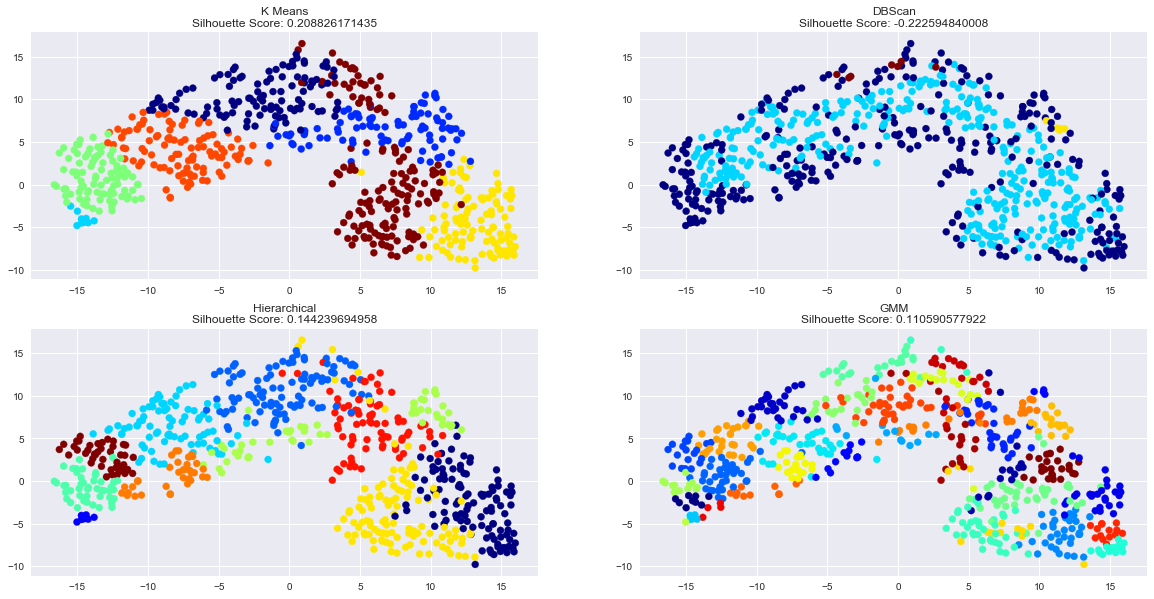

In [20]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
plt.rcParams['image.cmap'] = 'jet'

#k is the number of clusters and epsilon is radius in db-scan
k = 5
epsilon = 5
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=7)
dbscan = cluster.DBSCAN(eps= 5.4)
hierarchical = cluster.AgglomerativeClustering(n_clusters=10, affinity=distance_metric, linkage='ward')
gaussian_mm = mixture.GaussianMixture(n_components=32)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)

#compute the silhouette score for each clustering
kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)

#must have more than 1 cluster to compute the silhouette_score for dbscan
noise_index = np.argwhere(dbscan_labels==-1)
if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
    dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
else:
    dbscan_silhouette_score = None
    
hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)


#plot the results using the T-SNE representation
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.scatter(tsne_x, tsne_y, c= kmeans_labels)
plt.title('K Means'  + "\n" + 'Silhouette Score: ' + str(kmeans_silhouette_score))
plt.subplot(2,2,2)
plt.scatter(tsne_x, tsne_y, c= dbscan_labels)
plt.title('DBScan'  + "\n" + 'Silhouette Score: ' + str(dbscan_silhouette_score))
plt.subplot(2,2,3)
plt.scatter(tsne_x, tsne_y, c= hierarchical_labels)
plt.title('Hierarchical'  + "\n" + 'Silhouette Score: ' + str(hierarchical_silhouette_score))
plt.subplot(2,2,4)
plt.scatter(tsne_x, tsne_y, c= gaussian_mm_labels)
plt.title('DBScan'  + "\n" + 'Silhouette Score: ' + str(gaussian_mm_silhouette_score))
plt.show()

In [22]:
#k is the number of clusters and epsilon is radius in db-scan
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=7)
dbscan = cluster.DBSCAN(eps= 5.4)
hierarchical = cluster.AgglomerativeClustering(n_clusters=10, affinity=distance_metric, linkage='ward')
gaussian_mm = mixture.GaussianMixture(n_components=32)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)
#get the labels from the selected algorithm, e.g. kmeans
selected_labels = kmeans_labels

#add the labels to the dataset
labeled_dataset = dataset
labeled_dataset['cluster_label'] = pandas.Series(selected_labels)
labeled_dataset.to_csv('phobias_labeled.csv')

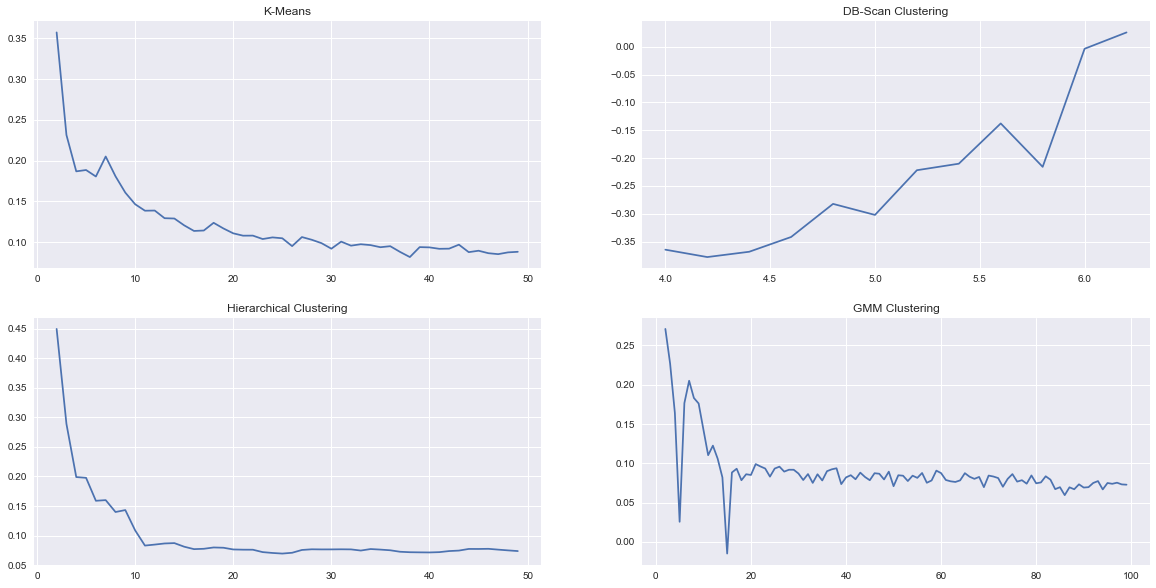

In [28]:
#scores for the parameters
kmeans_silhouette_scores = []
dbscan_silhouette_scores = []
hierarchical_silhouette_scores = []
gaussian_mm_silhouette_scores = []

distance_metric = 'manhattan'

#loop through different values for k and compute the silhouette score
for k in range(2,50,1):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(dataset)
    kmeans_labels = kmeans.labels_
    kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)
    kmeans_silhouette_scores.append(kmeans_silhouette_score)

#loop through different values for epsilon and compute the silhouette score
for epsilon in range(2,50,1):
    dbscan = cluster.DBSCAN(eps=epsilon*1.0/5)
    dbscan.fit(dataset)
    dbscan_labels = dbscan.labels_
    #must have more than 1 cluster to compute the silhouette_score
    noise_index = np.argwhere(dbscan_labels==-1)
    if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
        dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
        #dbscan_silhouette_scores.append(dbscan_silhouette_score)
    else:
        dbscan_silhouette_score = None
        #dbscan_silhouette_scores.append(0)
    dbscan_silhouette_scores.append(dbscan_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,50,1):
    hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='complete')
    hierarchical.fit(dataset)
    hierarchical_labels = hierarchical.labels_
    hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
    hierarchical_silhouette_scores.append(hierarchical_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,100,1):
    gaussian_mm = mixture.GaussianMixture(n_components=k)
    gaussian_mm.fit(dataset)
    gaussian_mm_labels = gaussian_mm.predict(dataset)
    gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)
    gaussian_mm_silhouette_scores.append(gaussian_mm_silhouette_score)
    
#plot silhouette score as function of k and epsilon
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.plot(range(2,50,1),kmeans_silhouette_scores)
plt.title('K-Means')
plt.subplot(2,2,2)
plt.plot([i/5.0 for i in range(2,50,1)],dbscan_silhouette_scores)
plt.title('DB-Scan Clustering')
plt.subplot(2,2,3)
plt.plot(range(2,50,1),hierarchical_silhouette_scores)
plt.title('Hierarchical Clustering')
plt.subplot(2,2,4)
plt.plot(range(2,100,1),gaussian_mm_silhouette_scores)
plt.title('GMM Clustering')
plt.show()

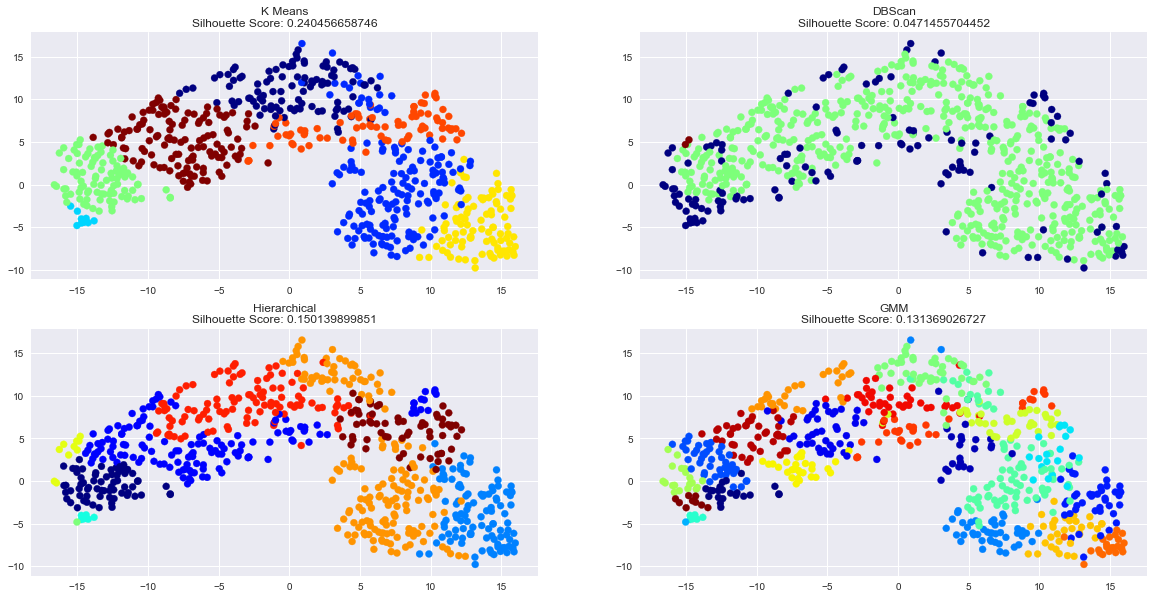

In [34]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
plt.rcParams['image.cmap'] = 'jet'

#k is the number of clusters and epsilon is radius in db-scan
k = 5
epsilon = 5
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=7)
dbscan = cluster.DBSCAN(eps= 6.2)
hierarchical = cluster.AgglomerativeClustering(n_clusters=9, affinity=distance_metric, linkage='complete')
gaussian_mm = mixture.GaussianMixture(n_components=21)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)

#compute the silhouette score for each clustering
kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)

#must have more than 1 cluster to compute the silhouette_score for dbscan
noise_index = np.argwhere(dbscan_labels==-1)
if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
    dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
else:
    dbscan_silhouette_score = None
    
hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)


#plot the results using the T-SNE representation
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.scatter(tsne_x, tsne_y, c= kmeans_labels)
plt.title('K Means'  + "\n" + 'Silhouette Score: ' + str(kmeans_silhouette_score))
plt.subplot(2,2,2)
plt.scatter(tsne_x, tsne_y, c= dbscan_labels)
plt.title('DBScan'  + "\n" + 'Silhouette Score: ' + str(dbscan_silhouette_score))
plt.subplot(2,2,3)
plt.scatter(tsne_x, tsne_y, c= hierarchical_labels)
plt.title('Hierarchical'  + "\n" + 'Silhouette Score: ' + str(hierarchical_silhouette_score))
plt.subplot(2,2,4)
plt.scatter(tsne_x, tsne_y, c= gaussian_mm_labels)
plt.title('GMM'  + "\n" + 'Silhouette Score: ' + str(gaussian_mm_silhouette_score))
plt.show()

NameError: name 'dbscan_silhouette_scores' is not defined

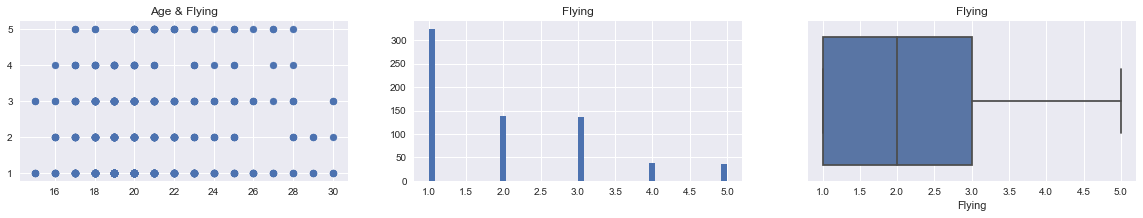